In [8]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [6]:
class BatsmenState(TypedDict):
    runs:int
    balls:int
    fours:int
    sixes:int
    sr:float
    bpb:float
    boundry_per:float
    summary:str

In [17]:
def calculate_sr(state:BatsmenState):
    sr=(state['runs']/state['balls'])*100

    return {'sr':sr}

In [12]:
def calculate_bpb(state:BatsmenState):
    bpb=state['balls']/(state['fours']+state['sixes'])

    return {'bpb':bpb}

In [21]:
def calculate_boundry_per(state:BatsmenState):
    boundry_per=(((state['fours']*4)+(state['sixes']*6))/state['runs'])*100
    return {'boundry_per':boundry_per}

In [22]:
def summary(state:BatsmenState):
    summary=f"""
strike rate -{state['sr']}\n
Balls per boundry- {state['bpb']}\ng
Boundry percenrage -{state['boundry_per']}
"""
    return {'summary':summary}

In [23]:
graph=StateGraph(BatsmenState)

graph.add_node("calculate_sr",calculate_sr)
graph.add_node("calculate_bpb",calculate_bpb)
graph.add_node("calculate_boundry_per",calculate_boundry_per)
graph.add_node("Summary",summary)

#edges
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundry_per')


graph.add_edge('calculate_sr','Summary')
graph.add_edge('calculate_bpb','Summary')
graph.add_edge('calculate_boundry_per','Summary')

workflow=graph.compile()

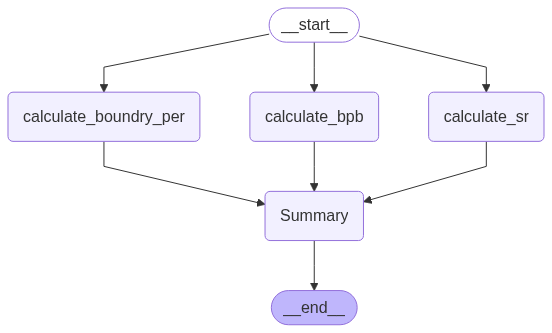

In [24]:
workflow

In [25]:
initial_state={'runs':100,
               'balls':50,
               'fours':4,
               "sixes":5}

final_out=workflow.invoke(initial_state)

print(final_out)


{'runs': 100, 'balls': 50, 'fours': 4, 'sixes': 5, 'sr': 200.0, 'bpb': 5.555555555555555, 'boundry_per': 46.0, 'summary': '\nstrike rate -200.0\n\nBalls per boundry- 5.555555555555555\ng\nBoundry percenrage -46.0\n'}
